`View Modul` :
1. https://en.wikipedia.org/wiki/Collaborative_filtering

2. https://www.kaggle.com/abdokamr/recommendation-system-form-zero-to-hero

2. https://www.kaggle.com/niclasbrger/movie-recommender-systems 

3. Data set : https://www.kaggle.com/rounakbanik/the-movies-dataset


#LOAD BERHASIL

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
 ! pip install -q kaggle

In [ ]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/drive/MyDrive/CAPSTONE/Husein/Collaborative_filterring_learn"

In [ ]:
%cd /content/drive/MyDrive/CAPSTONE/Husein/Collaborative_filterring_learn


/content/drive/MyDrive/CAPSTONE/Husein/Collaborative_filterring_learn


In [ ]:
!kaggle datasets download -d rounakbanik/the-movies-dataset

the-movies-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
!ls -a

Collaborative_filterring_learn.ipynb  movies_metadata.csv
credits.csv			      ratings.csv
kaggle.json			      ratings_small.csv
keywords.csv			      Recomendation_based_content.ipynb
links.csv			      Simpler_Recomender.ipynb
links_small.csv			      the-movies-dataset.zip


In [ ]:
"""!unzip \*.zip  && rm *.zipn
"""

Archive:  the-movies-dataset.zip
replace credits.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace keywords.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace links.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace links_small.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace movies_metadata.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace ratings.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace ratings_small.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
rm: cannot remove '*.zipn': No such file or directory


# Meta data


In [ ]:
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import numpy as np

In [ ]:

df_moviemetadata= pd.read_csv('/content/drive/MyDrive/CAPSTONE/Husein/Collaborative_filterring_learn/movies_metadata.csv')


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (10) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


`Recommender systems can be classified into 3 types:`

1- Simple recommenders: offer generalized recommendations to every user, based on movie popularity and/or genre. The basic idea behind this system is that movies that are more popular and critically acclaimed will have a higher probability of being liked by the average audience. An example could be IMDB Top 250.

2- Content-based recommenders: suggest similar items based on a particular item. This system uses item metadata, such as genre, director, description, actors, etc. for movies, to make these recommendations. The general idea behind these recommender systems is that if a person likes a particular item, he or she will also like an item that is similar to it. And to recommend that, it will make use of the user's past item metadata. A good example could be YouTube, where based on your history, it suggests you new videos that you could potentially watch.

2- Collaborative filtering engines: these systems are widely used, and they try to predict the rating or preference that a user would give an item-based on past ratings and preferences of other users. Collaborative filters do not require item metadata like its content-based counterparts.

## SIMPLER RECOMENDER


Let's build our first version of recommendation system

Simple Recommender.
Simple Recommender System based on the metric below:

weightedRating(WR) = ((v/v+m).R) + ((m/v+m).C)

v --> is the number of votes for the movie. (vote_count)

m --> is the min votes required to be listed in chart. (based on negative vote)

R --> is the average rating of the movie. (vote_average)

C --> is the mean vote across the the whole report. (calculate from data)


In [ ]:
df_moviemetadata.head(2)

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.9469,/rhIRbceoE9lR4veEXuwCC2wARtG.jpg,"[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,17.0155,/vzmL6fP7aPKNKPRTFnZmiUfciyV.jpg,"[{'name': 'TriStar Pictures', 'id': 559}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0


In [ ]:
  len(df_moviemetadata)

45466

In [ ]:
print(df_moviemetadata.columns)

Index(['adult', 'belongs_to_collection', 'budget', 'genres', 'homepage', 'id',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'video',
       'vote_average', 'vote_count'],
      dtype='object')


`Perhitungan`

In [ ]:
C=df_moviemetadata['vote_average'].mean()
C

5.618207215133889

In [ ]:
# count q1
m=df_moviemetadata['vote_count'].quantile(0.90)
m

160.0

In [ ]:
# Filter out all qualified movies into a new DataFrame
#copy data frame moviemetadata menajdi 1_movies setelah rata rata terbentuk
q_movies = df_moviemetadata.copy().loc[df_moviemetadata['vote_count'] >= m]
q_movies.shape

(4555, 24)

In [ ]:
def weighted_rating(x,m=m,C=C):
  v=x['vote_count']
  R=x['vote_average']

  #formula
  return (v/(v+m) * R) + (m/(m+v) * C)

In [ ]:
q_movies['score'] =q_movies.apply(weighted_rating,axis=1)
q_movies.head(2)

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,score
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.9469,/rhIRbceoE9lR4veEXuwCC2wARtG.jpg,"[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0,7.640253
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,17.0155,/vzmL6fP7aPKNKPRTFnZmiUfciyV.jpg,"[{'name': 'TriStar Pictures', 'id': 559}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0,6.820293


In [ ]:
q_movies.sort_values(by= 'score', ascending= False, inplace= True)
q_movies[['title', 'vote_count', 'vote_average', 'score']].head(10)

,title,vote_count,vote_average,score
314,The Shawshank Redemption,8358.0,8.5,8.445869
834,The Godfather,6024.0,8.5,8.425439
10309,Dilwale Dulhania Le Jayenge,661.0,9.1,8.421453
12481,The Dark Knight,12269.0,8.3,8.265477
2843,Fight Club,9678.0,8.3,8.256385
292,Pulp Fiction,8670.0,8.3,8.251406
522,Schindler's List,4436.0,8.3,8.206639
23673,Whiplash,4376.0,8.3,8.205404
5481,Spirited Away,3968.0,8.3,8.196055
2211,Life Is Beautiful,3643.0,8.3,8.187171


## RECOMENDER SYSTEM CONTENT-BASED

We will build a system that recommends movies that are similar to a particular movie. To achieve this, you will compute pairwise cosine similarity scores for all movies based on their descriptions and recommend movies based on that similarity score threshold.

The description is available to you as the overview feature in your metadata dataset

In [ ]:
df_moviemetadata.head(2)

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.9469,/rhIRbceoE9lR4veEXuwCC2wARtG.jpg,"[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,17.0155,/vzmL6fP7aPKNKPRTFnZmiUfciyV.jpg,"[{'name': 'TriStar Pictures', 'id': 559}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0


In [ ]:
df_moviemetadata.columns

Index(['adult', 'belongs_to_collection', 'budget', 'genres', 'homepage', 'id',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'video',
       'vote_average', 'vote_count'],
      dtype='object')

We need to extract some kind of features from the above text data before you can compute the similarity between them.

You will compute (TF-IDF) vectors for each document. This will give you a matrix where each column represents a word in the overview vocabulary.

In [ ]:
df_moviemetadata.isnull().sum() #check all the data with out nulll system

adult                        0
belongs_to_collection    40972
budget                       0
genres                       0
homepage                 37684
id                           0
imdb_id                     17
original_language           11
original_title               0
overview                   954
popularity                   5
poster_path                386
production_companies         3
production_countries         3
release_date                87
revenue                      6
runtime                    263
spoken_languages             6
status                      87
tagline                  25054
title                        6
video                        6
vote_average                 6
vote_count                   6
dtype: int64

In [ ]:
df_moviemetadata['overview'].isnull().sum()

954

In [ ]:
q_movies_withnulloverview = df_moviemetadata.copy() 
q_movies_withnulloverview.head(2)

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.9469,/rhIRbceoE9lR4veEXuwCC2wARtG.jpg,"[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,17.0155,/vzmL6fP7aPKNKPRTFnZmiUfciyV.jpg,"[{'name': 'TriStar Pictures', 'id': 559}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0


In [ ]:
q_movies_withnulloverview.isnull().sum()

adult                        0
belongs_to_collection    40972
budget                       0
genres                       0
homepage                 37684
id                           0
imdb_id                     17
original_language           11
original_title               0
overview                   954
popularity                   5
poster_path                386
production_companies         3
production_countries         3
release_date                87
revenue                      6
runtime                    263
spoken_languages             6
status                      87
tagline                  25054
title                        6
video                        6
vote_average                 6
vote_count                   6
dtype: int64

In [ ]:
q_movies_withnulloverview['overview']=q_movies_withnulloverview['overview'].fillna('')

In [ ]:
q_movies_withnulloverview.isnull().sum()

adult                        0
belongs_to_collection    40972
budget                       0
genres                       0
homepage                 37684
id                           0
imdb_id                     17
original_language           11
original_title               0
overview                     0
popularity                   5
poster_path                386
production_companies         3
production_countries         3
release_date                87
revenue                      6
runtime                    263
spoken_languages             6
status                      87
tagline                  25054
title                        6
video                        6
vote_average                 6
vote_count                   6
dtype: int64

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
tfidf = TfidfVectorizer(stop_words= 'english')
tfidf_matrix = tfidf.fit_transform(q_movies_withnulloverview['overview'])
tfidf_matrix.shape

#the mean off : We see that over 75827 different words were used to describe the 45466 movies in our dataset.

(45466, 75827)

In [ ]:
tfidf.get_feature_names()[1:10]

['000', '000km', '000th', '001', '006', '007', '008', '009', '0093']

With this matrix in hand, you can now compute a similarity score. There are several similarity metrics that you can use for this, such as the manhattan, euclidean, the Pearson, and the cosine similarity scores. Again, there is no right answer to which score is the best.

You will be using the cosine similarity to calculate a numeric quantity that denotes the similarity between two movies. You use the cosine similarity score since it is independent of magnitude and is relatively easy and fast to calculate.

Since we have used the TF-IDF vectorizer, calculating the dot product between each vector will directly give you the cosine similarity score. Therefore, you will use sklearn's linear_kernel() instead of cosine_similarities() since it is faster.

Compute the pair-wise cosine similarity between all overviews of movies.

x.y=||x||.||y||.cos(θ)
 
So
cos(θ)=x.y||x||||y||
 
So we can use the linear_kernel from sklearn, which is faster than cosine_similarity

In [ ]:
from sklearn.metrics.pairwise import linear_kernel

# Compute the cosine similarity matrix
tfidf_matrix  = tfidf_matrix[:30000] # 30000 for prevent allocate more memory than is available. It has restarted.
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

In [ ]:
cosine_sim.shape

(30000, 30000)

In [ ]:
cosine_sim[1]

array([0.01504121, 1.        , 0.04681953, ..., 0.        , 0.        ,
       0.02303661])

Each movie will be a 1 * 30000 column vector where each column will be a similarity score with each movie.

We need to map movie titles and DataFrame indices. In other words, you need a mechanism to identify the index of a movie in your metadata DataFrame, given its title.

In [ ]:
indices = pd.Series(index=q_movies_withnulloverview['title'], data = q_movies_withnulloverview.index).drop_duplicates()
indices

title
Toy Story                          0
Jumanji                            1
Grumpier Old Men                   2
Waiting to Exhale                  3
Father of the Bride Part II        4
                               ...  
Subdue                         45461
Century of Birthing            45462
Betrayal                       45463
Satan Triumphant               45464
Queerama                       45465
Length: 45466, dtype: int64

In [ ]:
q_movies_withnulloverview['title'].head(2)

0    Toy Story
1      Jumanji
Name: title, dtype: object

In [ ]:
# make a function
def get_recomendations(title ,cosine_sim=cosine_sim):
  idx=indices[title] # cari index film yang sesuai dengan judul
  sim_scores=list(enumerate(cosine_sim[idx])) # bikn skor kesamaan antar2 film 
  sim_scores=sorted(sim_scores, key=lambda x:x[1],reverse=True) #film akan diurutkan berdasarkan kemiripan kesamaan
  sim_scores=sim_scores[1:11] #score 10 film yang hampir sama
  movie_indices = [i[0] for i in sim_scores] # # Get the movie indices
  return q_movies_withnulloverview['title'][movie_indices]


In [ ]:
get_recomendations('The Dark Knight Rises')

12481                                      The Dark Knight
150                                         Batman Forever
1328                                        Batman Returns
15511                           Batman: Under the Red Hood
585                                                 Batman
21194    Batman Unmasked: The Psychology of the Dark Kn...
9230                    Batman Beyond: Return of the Joker
18035                                     Batman: Year One
19792              Batman: The Dark Knight Returns, Part 1
3095                          Batman: Mask of the Phantasm
Name: title, dtype: object

In [ ]:
get_recomendations('Jumanji')

21633                   Table No. 21
17223                 The Dark Angel
8801                         Quintet
6166                       Brainscan
9503                       Word Wars
13601    The Mindscape of Alan Moore
13711                     Rhinoceros
16843                         DeVour
8079                         Masques
6055                Poolhall Junkies
Name: title, dtype: object

`Akan menambah dan meningkatkan rekomendasi system berdasarkan the 3 top actors, the director, related genres, and the movie keywords.`

In [ ]:
df_credits= pd.read_csv('/content/drive/MyDrive/CAPSTONE/Husein/Collaborative_filterring_learn/credits.csv') # didalam credits ada nama aktor yang merujuk index
df_keywords=pd.read_csv('/content/drive/MyDrive/CAPSTONE/Husein/Collaborative_filterring_learn/keywords.csv')

In [ ]:
df_moviemetadata = df_moviemetadata.drop([19730, 29503, 35587])


In [ ]:
# Convert IDs to int. Required for merging
df_keywords['id'] = df_keywords['id'].astype('int')
df_credits['id'] = df_credits['id'].astype('int')
df_moviemetadata['id'] = df_moviemetadata['id'].astype('int')

# Merge keywords and credits into your main metadata dataframe
df_moviemetadata = df_moviemetadata.merge(df_credits, on='id')
df_moviemetadata = df_moviemetadata.merge(df_keywords, on='id')
df_moviemetadata.head()

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,cast,crew,keywords
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.9469,/rhIRbceoE9lR4veEXuwCC2wARtG.jpg,"[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0,"[{'cast_id': 14, 'character': 'Woody (voice)',...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de...","[{'id': 931, 'name': 'jealousy'}, {'id': 4290,..."
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,17.0155,/vzmL6fP7aPKNKPRTFnZmiUfciyV.jpg,"[{'name': 'TriStar Pictures', 'id': 559}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0,"[{'cast_id': 1, 'character': 'Alan Parrish', '...","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...","[{'id': 10090, 'name': 'board game'}, {'id': 1..."
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,11.7129,/6ksm1sjKMFLbO7UY2i6G1ju9SML.jpg,"[{'name': 'Warner Bros.', 'id': 6194}, {'name'...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0,"[{'cast_id': 2, 'character': 'Max Goldman', 'c...","[{'credit_id': '52fe466a9251416c75077a89', 'de...","[{'id': 1495, 'name': 'fishing'}, {'id': 12392..."
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",3.85949,/16XOMpEaLWkrcPqSQqhTmeJuqQl.jpg,[{'name': 'Twentieth Century Fox Film Corporat...,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0,"[{'cast_id': 1, 'character': ""Savannah 'Vannah...","[{'credit_id': '52fe44779251416c91011acb', 'de...","[{'id': 818, 'name': 'based on novel'}, {'id':..."
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,8.38752,/e64sOI48hQXyru7naBFyssKFxVd.jpg,"[{'name': 'Sandollar Productions', 'id': 5842}...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0,"[{'cast_id': 1, 'character': 'George Banks', '...","[{'credit_id': '52fe44959251416c75039ed7', 'de...","[{'id': 1009, 'name': 'baby'}, {'id': 1599, 'n..."


## COLLABORATIVE FILTERING


* `User-based Filtering`: these systems recommend products to a user that similar users have liked. For example, let's say Alice and Bob have a similar interest in books (that is, they largely like and dislike the same books). Now, let's say a new book has been launched into the market, and Alice has read and loved it. It is, therefore, highly likely that Bob will like it too, and therefore, the system recommends this book to Bob.

* `Item-based Filtering`: these systems are extremely similar to the content recommendation engine that we have been built. These systems identify similar items based on how people have rated it in the past. For example, if Alice, Bob, and Eve have given 5 stars to The Lord of the Rings and The Hobbit, the system identifies the items as similar. Therefore, if someone buys The Lord of the Rings, the system also recommends The Hobbit to him or her.

In [ ]:
df_ratings = pd.read_csv('/content/drive/MyDrive/CAPSTONE/Husein/Collaborative_filterring_learn/ratings.csv')

In [ ]:
df_ratings.head(2)

,userId,movieId,rating,timestamp
0,1,110,1.0,1425941529
1,1,147,4.5,1425942435


In [ ]:
q_movies_colabsfilter=df_moviemetadata.copy() # kita copy ke variable baru untuk data aslinya, agar bisa diolah citra
q_movies_colabsfilter.isnull().sum()

adult                        0
belongs_to_collection    40972
budget                       0
genres                       0
homepage                 37684
id                           0
imdb_id                     17
original_language           11
original_title               0
overview                   954
popularity                   5
poster_path                386
production_companies         3
production_countries         3
release_date                87
revenue                      6
runtime                    263
spoken_languages             6
status                      87
tagline                  25054
title                        6
video                        6
vote_average                 6
vote_count                   6
dtype: int64

`Coba perhatikan data csv movies` : 

In [ ]:
movies=q_movies_colabsfilter[['id', 'title', 'genres']]
movies['genres']=["".join(st) for st in movies['genres']] 
movies.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,id,title,genres
0,862,Toy Story,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '..."
1,8844,Jumanji,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '..."
2,15602,Grumpier Old Men,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ..."
3,31357,Waiting to Exhale,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam..."
4,11862,Father of the Bride Part II,"[{'id': 35, 'name': 'Comedy'}]"


In [ ]:
pd.crosstab(df_ratings['userId'],q_movies_colabsfilter['id']).head()

id,100,10000,10001,100010,100017,10002,100024,10003,100032,100033,10004,100042,100046,10005,100057,10006,100061,100063,10007,10008,100085,100086,100088,100089,10009,10010,10011,100110,10012,100122,10013,10014,10015,100152,10016,100167,10017,100179,10018,100183,...,9978,99785,9980,99802,9981,99819,9982,99826,99846,99859,9986,99861,99863,9987,99875,99877,99879,9988,99880,99883,99885,9989,99896,99898,9990,99904,99909,9991,99916,9992,99920,99922,9993,99934,9994,99946,9995,9997,99977,9999
userId,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


`ENCODING` : There are gaps in each user id and in each movie id, It's not sequential numbers like 0,1,2,3,4 .. etc it something like 862, 8844, 15602, .. etc, so we will use LabelEncoder() for making them in a sequential way like 0,1,2,3,4 .. etc.

In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
#df_ratings['user'] = encoder.fit_transform(df_ratings['userId'].values)
df_ratings['user'] = encoder.fit_transform(df_ratings['userId'].values)
n_users=df_ratings['user'].nunique()

df_ratings['movie'] = encoder.fit_transform(df_ratings['movieId'].values)
n_movies=df_ratings['movie'].nunique()

df_ratings['rating']=df_ratings['rating'].values.astype(np.float32)

min_rating = min(df_ratings['rating'])
max_rating = max(df_ratings['rating'])

n_users, n_movies, min_rating, max_rating

(270896, 45115, 0.5, 5.0)

`Extract train and test`

In [ ]:
from sklearn.model_selection import train_test_split
X = df_ratings[['user', 'movie']].values
y = df_ratings['rating'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(23421860, 2) (23421860,)
(2602429, 2) (2602429,)


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 1)]          0                                            
__________________________________________________________________________________________________
input_2 (InputLayer)            [(None, 1)]          0                                            
__________________________________________________________________________________________________
embedding (Embedding)           (None, 1, 50)        13544800    input_1[0][0]                    
__________________________________________________________________________________________________
embedding_1 (Embedding)         (None, 1, 50)        2255750     input_2[0][0]                    
______________________________________________________________________________________________

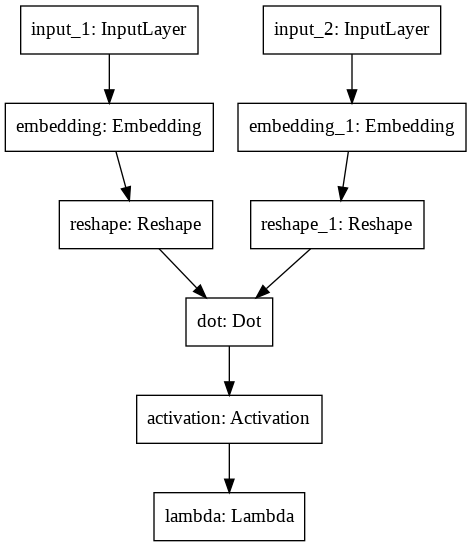

In [ ]:
from tensorflow.keras import layers
from tensorflow.keras import regularizers
from tensorflow.keras import models
from tensorflow.keras import losses
from tensorflow.keras import metrics
from tensorflow.keras import optimizers
from tensorflow.keras.utils import plot_model
# Number of latent factors
emb_sz = 50

# User embeddings
user = layers.Input(shape=(1,))
user_emb = layers.Embedding(n_users, emb_sz, embeddings_regularizer=regularizers.l2(1e-6))(user)
user_emb = layers.Reshape((emb_sz,))(user_emb)

# Movie embeddings
movie = layers.Input(shape=(1,))
movie_emb = layers.Embedding(n_movies, emb_sz, embeddings_regularizer=regularizers.l2(1e-6))(movie)
movie_emb = layers.Reshape((emb_sz,))(movie_emb)

# Dot product
rating = layers.Dot(axes=1)([user_emb, movie_emb])
rating = layers.Activation('sigmoid')(rating)
rating = layers.Lambda(lambda x:x*(max_rating - min_rating) + min_rating)(rating) # scalling up

# Model
model = models.Model([user, movie], rating)

# Compile the model
model.compile(loss='mse', metrics=metrics.RootMeanSquaredError(),
              optimizer=optimizers.Adam(lr=0.001))

# Show model summary
model.summary()
plot_model(model)